## Тема “Обучение с учителем”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.   
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.   
Создайте датафреймы X и y из этих данных.   
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.   
Масштабируйте данные с помощью StandardScaler.   

Постройте модель TSNE на тренировочный данных с параметрами:   
- n_components=2, learning_rate=250, random_state=42.
- Постройте диаграмму рассеяния на этих данных.



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
%matplotlib inline

In [3]:
boston = load_boston()
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=['price'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
scaler = StandardScaler(with_mean=False)

In [11]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=250)
X_train_tsne = tsne.fit_transform(X_train_scaled)

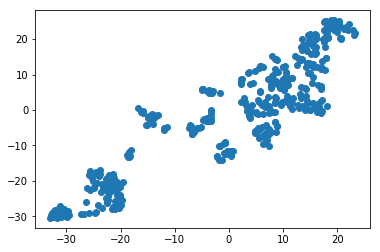

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.   
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.   
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.  
Вычислите средние значения price и CRIM в разных кластерах.


In [22]:
from sklearn.cluster import KMeans

In [24]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [25]:
train_labels = model.fit_predict(X_train)

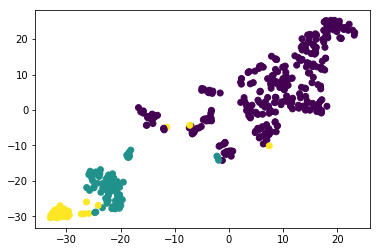

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

In [31]:
print('Кластер 0: {}'.format(y_train.loc[train_labels == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[train_labels == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[train_labels == 2, 'price'].mean()))

Кластер 0: 25.168686868686873
Кластер 1: 17.4421052631579
Кластер 2: 13.196774193548386


In [32]:
print('Кластер 0: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean()))

Кластер 0: 0.40486282828282844
Кластер 1: 11.745661842105266
Кластер 2: 14.360380322580648


### * Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.   
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [34]:
test_labels = model.fit_predict(X_test)

In [40]:
print('Кластер 0: {}'.format(y_test.loc[test_labels == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[test_labels == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[test_labels == 2, 'price'].mean()))

Кластер 0: 23.911594202898552
Кластер 1: 17.39230769230769
Кластер 2: 12.814285714285713


In [41]:
print('Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Кластер 0: 0.2464211594202899
Кластер 1: 8.469301923076923
Кластер 2: 19.021665714285714
